# Data Extraction and NLP

In [2]:
!pip install bs4

In [3]:
!pip install nltk

In [4]:
!pip install syllables

In [5]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re
import numpy as np
import os
import syllables
import string
import seaborn as sns
import matplotlib.pyplot as plt 

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ilika
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df = pd.read_excel("Input.xlsx") #Loading input file

In [8]:
df['heading'] = ''
df['text'] = ''

In [9]:
df.head()

,URL,heading,text
0,https://twobrothersindiashop.com/products/amor...,,
1,https://twobrothersindiashop.com/products/full...,,
2,https://twobrothersindiashop.com/products/amla...,,
3,https://twobrothersindiashop.com/products/sing...,,
4,https://twobrothersindiashop.com/products/khap...,,


### Web Scrapping of Data

In [10]:
for url in df['URL']:
    #Testing Code
    responseobject = requests.get(url)
    if responseobject.status_code == 200:

        soup = BeautifulSoup(responseobject.content,'html.parser')
        
        #Find Heading
        heading = soup.find('h1',class_='product-meta__title hidden-phone heading custom_gotham_mediumh4').text.strip()
        heading=re.sub('[;:,\(,\),\:,\–,\“,\%,\,\•,\?,\”,\|,\-,\?\"\'\/]','',heading)

        
        #Find Article Paragraph
        allcontent = soup.find('div',class_='product-tabs__tab-item-content rte custom_gotham_book_medium')

        allparagraphs = allcontent.find_all('p')
        paragraphs=[]
        for paragraph in allparagraphs:
            paragraphs.append(paragraph.get_text(' ',strip=True))
        paragraphtext=' '.join([par.lower().strip() for par in paragraphs]) 
        paragraphtext=re.sub('[;:,\(,\),\:,\–,\“,\%,\,\•,\?,\”,\|,\-,\?\"\'\/]','',paragraphtext)      
        
        #Find Article Reviews
        allreviews = soup.find('div',class_="jdgm-rev-widg__reviews")

        reviews = allreviews.find_all('p')
        transformedreviews=[]

        for review in reviews:
            transformedreviews.append(review.get_text(' ',strip=True))
        reviewtext=' '.join([review.lower().strip() for review in transformedreviews]) 
        reviewtext=re.sub('[;:,\(,\),\:,\–,\“,\%,\,\•,\?,\”,\|,\-,\?\"\'\/]','',reviewtext)  
        #print(reviewtext)
        
        alllheadings = allcontent.find_all(['h2','h3','h4','h5','h6'])
        headitems=[]
        for headitem in alllheadings:
            headitems.append(headitem.get_text(' ',strip=True))
        #print(headitems)
        headlisttext=' '.join([itemh.lower().strip() for itemh in headitems]) 
        headlisttext=re.sub('[;:,\(,\),\:,\–,\“,\%,\,\•,\?,\”,\|,\-,\?\"\'\/]','',headlisttext)        
      

        totaltext = heading.lower()+' '+paragraphtext+' '+reviewtext+' '+headlisttext   
            
        condition = df['URL'] == url
        df['heading'] = np.where(condition,heading,df['heading'])
        df['text'] = np.where(condition,totaltext,df['text'])
        
    else:
        print('Unable to get page:Status Code is',responseobject.status_code)
 

In [11]:
df.head()

,URL,heading,text
0,https://twobrothersindiashop.com/products/amor...,A2 Cow Cultured Ghee Desi Gir Cow,a2 cow cultured ghee desi gir cow our special ...
1,https://twobrothersindiashop.com/products/full...,Full Moon Cultured Ghee Desi Gir Cow,full moon cultured ghee desi gir cow this ghe...
2,https://twobrothersindiashop.com/products/amla...,Amlaprash Limited Edition Chyawanprash,amlaprash limited edition chyawanprash we decl...
3,https://twobrothersindiashop.com/products/sing...,Single Origin Lakadong Turmeric Powder 150g,single origin lakadong turmeric powder 150g th...
4,https://twobrothersindiashop.com/products/khap...,Khapli Ghee Shankarpali Sweetened with Mishri,khapli ghee shankarpali sweetened with mishri...


### Exttacting list of positive, negative, and stopwords given

In [12]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def find_clean_text(text):
    wordlist = word_tokenize(text)
    clean_words = [word for word in wordlist if word.lower() not in stop_words]  
    translator = str.maketrans("", "", string.punctuation)
    clean_words_list = [item.lower().translate(translator) for item in clean_words]
    clean_text = ' '.join(clean_words_list)
    return clean_text

[nltk_data] Downloading package stopwords to C:\Users\Ilika
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
file_path = r'C:\Users\Ilika Sharma\Desktop\Career\Selection Assignments\The Village Company\negative-words.txt'

with open(file_path, 'r') as file:
    negtext = file.read()
    negwords = nltk.word_tokenize(negtext)
    negwords = list(set(negwords))    
negwords

['moody',
 'vagueness',
 'excessive',
 'hysterical',
 'lawless',
 'squealing',
 'crashing',
 'aborted',
 'idle',
 'monstrosities',
 'lecherous',
 'infest',
 'revolt',
 'tumultuous',
 'dissatisfied',
 'protesting',
 'effrontery',
 'demolish',
 'malaise',
 'eccentric',
 'scrap',
 'stumps',
 'grieve',
 'haste',
 'fault',
 'desperately',
 'retarded',
 'inappropriately',
 'heavyhearted',
 'inept',
 'missed',
 'undesirable',
 'curses',
 'downsides',
 'fraught',
 'contagious',
 'intolerance',
 'disapprobation',
 'incommensurate',
 'vibrated',
 'uproarously',
 'impatience',
 'stupified',
 'breakup',
 'fumble',
 'sidetrack',
 'spewed',
 'subvert',
 'worthlessness',
 'disapproving',
 'greed',
 'infamy',
 'anger',
 'foolishness',
 'heretical',
 'drought',
 'lewd',
 'oddest',
 'pettifog',
 'quash',
 'reactionary',
 'desperation',
 'reprehension',
 'faltered',
 'merciless',
 'rejecting',
 'friggin',
 'punk',
 'oversimplify',
 'imperfectly',
 'liars',
 'disagrees',
 'overblown',
 'forfeit',
 'sinist

In [14]:
file_path = r'C:\Users\Ilika Sharma\Desktop\Career\Selection Assignments\The Village Company\positive-words.txt'

with open(file_path, 'r') as file:
    postext = file.read()
    postwords = nltk.word_tokenize(postext)
    postwords = list(set(postwords))
        
postwords

['energetic',
 'relent',
 'hotcake',
 'work',
 'zeal',
 'paramount',
 'enjoyably',
 'jaw-droping',
 'virtuous',
 'supportive',
 'gleefully',
 'guarantee',
 'wisdom',
 'honesty',
 'enthusiast',
 'serenity',
 'hail',
 'confident',
 'cohere',
 'joyful',
 'whoooa',
 'trouble-free',
 'realistic',
 'unrestricted',
 'celebratory',
 'risk-free',
 'kindly',
 'outstandingly',
 'adjustable',
 'remarkably',
 'confidence',
 'exceedingly',
 'plusses',
 'assurances',
 'tough',
 'acclaimed',
 'geekier',
 'favorite',
 'self-determination',
 'rewardingly',
 'calm',
 'glimmer',
 'affluent',
 'affable',
 'navigable',
 'proven',
 'sustainable',
 'resolute',
 'dead-on',
 'devout',
 'exhilaratingly',
 'rewarding',
 'avid',
 'everlasting',
 'exult',
 'pleasurably',
 'civilize',
 'relief',
 'improves',
 'complements',
 'simplest',
 'willing',
 'graciously',
 'sumptuous',
 'transparent',
 'accomplishment',
 'regal',
 'favorable',
 'precious',
 'rectifying',
 'better',
 'gumption',
 'finely',
 'dumbfounding',
 '

In [15]:
df.head(100)

,URL,heading,text
0,https://twobrothersindiashop.com/products/amor...,A2 Cow Cultured Ghee Desi Gir Cow,a2 cow cultured ghee desi gir cow our special ...
1,https://twobrothersindiashop.com/products/full...,Full Moon Cultured Ghee Desi Gir Cow,full moon cultured ghee desi gir cow this ghe...
2,https://twobrothersindiashop.com/products/amla...,Amlaprash Limited Edition Chyawanprash,amlaprash limited edition chyawanprash we decl...
3,https://twobrothersindiashop.com/products/sing...,Single Origin Lakadong Turmeric Powder 150g,single origin lakadong turmeric powder 150g th...
4,https://twobrothersindiashop.com/products/khap...,Khapli Ghee Shankarpali Sweetened with Mishri,khapli ghee shankarpali sweetened with mishri...
5,https://twobrothersindiashop.com/products/raw-...,Raw Cashew Nuts,raw cashew nuts raw cashew nuts apart from ca...
6,https://twobrothersindiashop.com/products/trad...,Traditional Crispy Chakli Deep fried in Wood...,traditional crispy chakli deep fried in wood...
7,https://twobrothersindiashop.com/products/kash...,Single Origin Kashmiri Mongra Saffron,single origin kashmiri mongra saffron single ...
8,https://twobrothersindiashop.com/products/blac...,Black Mustard Oil I ColdPressed,black mustard oil i coldpressed cold pressed b...
9,https://twobrothersindiashop.com/products/virg...,Virgin Coconut Oil Cold Pressed Single Filtered,virgin coconut oil cold pressed single filte...


## Performing Sentiment Analysis

### Removing Stopwords

In [16]:
df['clean_text'] = df['text'].apply(find_clean_text)

In [17]:
df.head()

,URL,heading,text,clean_text
0,https://twobrothersindiashop.com/products/amor...,A2 Cow Cultured Ghee Desi Gir Cow,a2 cow cultured ghee desi gir cow our special ...,a2 cow cultured ghee desi gir cow special 5 li...
1,https://twobrothersindiashop.com/products/full...,Full Moon Cultured Ghee Desi Gir Cow,full moon cultured ghee desi gir cow this ghe...,full moon cultured ghee desi gir cow ghee prep...
2,https://twobrothersindiashop.com/products/amla...,Amlaprash Limited Edition Chyawanprash,amlaprash limited edition chyawanprash we decl...,amlaprash limited edition chyawanprash declare...
3,https://twobrothersindiashop.com/products/sing...,Single Origin Lakadong Turmeric Powder 150g,single origin lakadong turmeric powder 150g th...,single origin lakadong turmeric powder 150g tw...
4,https://twobrothersindiashop.com/products/khap...,Khapli Ghee Shankarpali Sweetened with Mishri,khapli ghee shankarpali sweetened with mishri...,khapli ghee shankarpali sweetened mishri khapl...


### Finding Positive Score

In [18]:
def find_positive_score(text):
    positive_score = 0
    splitposlist = word_tokenize(text)
    for word in splitposlist:
        if word in postwords:
            positive_score+=1
    return positive_score

In [19]:
df['POSITIVE SCORE'] = df['clean_text'].apply(find_positive_score)

In [20]:
df.head()

,URL,heading,text,clean_text,POSITIVE SCORE
0,https://twobrothersindiashop.com/products/amor...,A2 Cow Cultured Ghee Desi Gir Cow,a2 cow cultured ghee desi gir cow our special ...,a2 cow cultured ghee desi gir cow special 5 li...,28
1,https://twobrothersindiashop.com/products/full...,Full Moon Cultured Ghee Desi Gir Cow,full moon cultured ghee desi gir cow this ghe...,full moon cultured ghee desi gir cow ghee prep...,15
2,https://twobrothersindiashop.com/products/amla...,Amlaprash Limited Edition Chyawanprash,amlaprash limited edition chyawanprash we decl...,amlaprash limited edition chyawanprash declare...,19
3,https://twobrothersindiashop.com/products/sing...,Single Origin Lakadong Turmeric Powder 150g,single origin lakadong turmeric powder 150g th...,single origin lakadong turmeric powder 150g tw...,12
4,https://twobrothersindiashop.com/products/khap...,Khapli Ghee Shankarpali Sweetened with Mishri,khapli ghee shankarpali sweetened with mishri...,khapli ghee shankarpali sweetened mishri khapl...,17


### Finding Negative Score

In [21]:
def find_negative_score(text):
    negative_score = 0
    splitneglist = word_tokenize(text)
    for word in splitneglist:
        if word in negwords:
            negative_score-=1
    final_negative_score = negative_score*-1
    return final_negative_score

In [22]:
df['NEGATIVE SCORE'] = df['clean_text'].apply(find_negative_score)

In [23]:
df.head()

,URL,heading,text,clean_text,POSITIVE SCORE,NEGATIVE SCORE
0,https://twobrothersindiashop.com/products/amor...,A2 Cow Cultured Ghee Desi Gir Cow,a2 cow cultured ghee desi gir cow our special ...,a2 cow cultured ghee desi gir cow special 5 li...,28,2
1,https://twobrothersindiashop.com/products/full...,Full Moon Cultured Ghee Desi Gir Cow,full moon cultured ghee desi gir cow this ghe...,full moon cultured ghee desi gir cow ghee prep...,15,2
2,https://twobrothersindiashop.com/products/amla...,Amlaprash Limited Edition Chyawanprash,amlaprash limited edition chyawanprash we decl...,amlaprash limited edition chyawanprash declare...,19,4
3,https://twobrothersindiashop.com/products/sing...,Single Origin Lakadong Turmeric Powder 150g,single origin lakadong turmeric powder 150g th...,single origin lakadong turmeric powder 150g tw...,12,2
4,https://twobrothersindiashop.com/products/khap...,Khapli Ghee Shankarpali Sweetened with Mishri,khapli ghee shankarpali sweetened with mishri...,khapli ghee shankarpali sweetened mishri khapl...,17,1


### Finding Polarity Score

In [24]:
def find_polarity_score(text):
    positive_score = 0
    splitposlist = word_tokenize(text)
    for word in splitposlist:
        if word in postwords:
            positive_score+=1
    
    negative_score = 0
    splitneglist = word_tokenize(text)
    for word in splitneglist:
        if word in negwords:
            negative_score-=1
    final_negative_score = negative_score*-1
    
    polarity_score = (positive_score-final_negative_score)/((positive_score+final_negative_score)+0.000001)
    
    return polarity_score

In [25]:
df['POLARITY SCORE'] = df['clean_text'].apply(find_polarity_score)

In [26]:
df.head()

,URL,heading,text,clean_text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE
0,https://twobrothersindiashop.com/products/amor...,A2 Cow Cultured Ghee Desi Gir Cow,a2 cow cultured ghee desi gir cow our special ...,a2 cow cultured ghee desi gir cow special 5 li...,28,2,0.866667
1,https://twobrothersindiashop.com/products/full...,Full Moon Cultured Ghee Desi Gir Cow,full moon cultured ghee desi gir cow this ghe...,full moon cultured ghee desi gir cow ghee prep...,15,2,0.764706
2,https://twobrothersindiashop.com/products/amla...,Amlaprash Limited Edition Chyawanprash,amlaprash limited edition chyawanprash we decl...,amlaprash limited edition chyawanprash declare...,19,4,0.652174
3,https://twobrothersindiashop.com/products/sing...,Single Origin Lakadong Turmeric Powder 150g,single origin lakadong turmeric powder 150g th...,single origin lakadong turmeric powder 150g tw...,12,2,0.714286
4,https://twobrothersindiashop.com/products/khap...,Khapli Ghee Shankarpali Sweetened with Mishri,khapli ghee shankarpali sweetened with mishri...,khapli ghee shankarpali sweetened mishri khapl...,17,1,0.888889


### Finding Subjectivity Score

In [27]:
def find_subjectivity_score(text):
    positive_score = 0
    splitposlist = word_tokenize(text)
    for word in splitposlist:
        if word in postwords:
            positive_score+=1
    
    negative_score = 0
    splitneglist = word_tokenize(text)
    for word in splitneglist:
        if word in negwords:
            negative_score-=1
    final_negative_score = negative_score*-1
    
    subjectivity_score = (positive_score+final_negative_score)/((len(splitposlist))+0.000001)
    
    return subjectivity_score

In [28]:
df['SUBJECTIVITY SCORE'] = df['clean_text'].apply(find_subjectivity_score)

In [29]:
df

,URL,heading,text,clean_text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE
0,https://twobrothersindiashop.com/products/amor...,A2 Cow Cultured Ghee Desi Gir Cow,a2 cow cultured ghee desi gir cow our special ...,a2 cow cultured ghee desi gir cow special 5 li...,28,2,0.866667,0.106383
1,https://twobrothersindiashop.com/products/full...,Full Moon Cultured Ghee Desi Gir Cow,full moon cultured ghee desi gir cow this ghe...,full moon cultured ghee desi gir cow ghee prep...,15,2,0.764706,0.149123
2,https://twobrothersindiashop.com/products/amla...,Amlaprash Limited Edition Chyawanprash,amlaprash limited edition chyawanprash we decl...,amlaprash limited edition chyawanprash declare...,19,4,0.652174,0.146497
3,https://twobrothersindiashop.com/products/sing...,Single Origin Lakadong Turmeric Powder 150g,single origin lakadong turmeric powder 150g th...,single origin lakadong turmeric powder 150g tw...,12,2,0.714286,0.144330
4,https://twobrothersindiashop.com/products/khap...,Khapli Ghee Shankarpali Sweetened with Mishri,khapli ghee shankarpali sweetened with mishri...,khapli ghee shankarpali sweetened mishri khapl...,17,1,0.888889,0.225000
5,https://twobrothersindiashop.com/products/raw-...,Raw Cashew Nuts,raw cashew nuts raw cashew nuts apart from ca...,raw cashew nuts raw cashew nuts apart cashew p...,3,2,0.200000,0.227273
6,https://twobrothersindiashop.com/products/trad...,Traditional Crispy Chakli Deep fried in Wood...,traditional crispy chakli deep fried in wood...,traditional crispy chakli deep fried woodpress...,8,1,0.777778,0.236842
7,https://twobrothersindiashop.com/products/kash...,Single Origin Kashmiri Mongra Saffron,single origin kashmiri mongra saffron single ...,single origin kashmiri mongra saffron single o...,1,0,0.999999,0.033333
8,https://twobrothersindiashop.com/products/blac...,Black Mustard Oil I ColdPressed,black mustard oil i coldpressed cold pressed b...,black mustard oil coldpressed cold pressed bla...,6,6,0.000000,0.142857
9,https://twobrothersindiashop.com/products/virg...,Virgin Coconut Oil Cold Pressed Single Filtered,virgin coconut oil cold pressed single filte...,virgin coconut oil cold pressed single filtere...,5,3,0.250000,0.133333


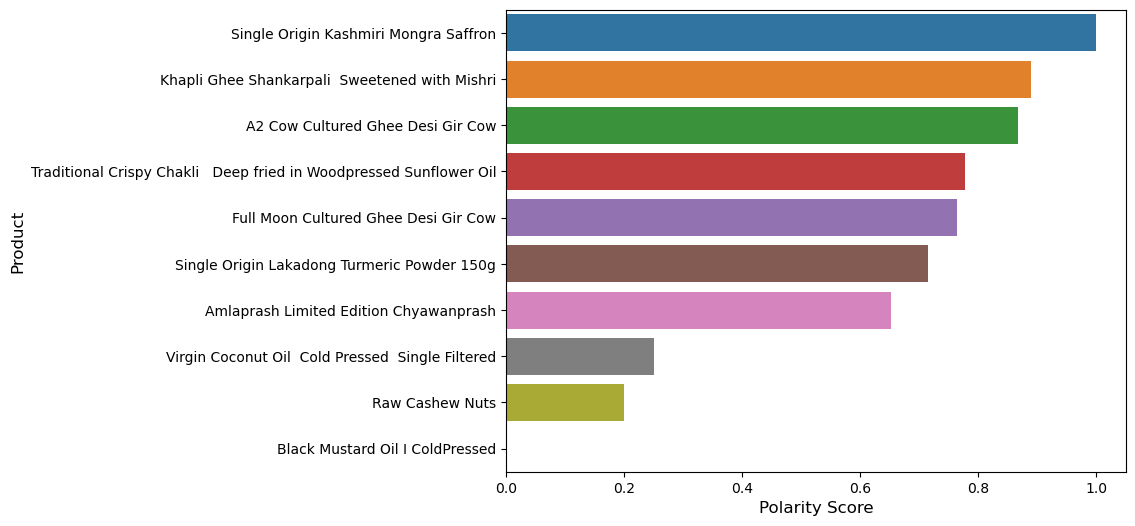

In [30]:
# Sort the data in descending order

sorted_data = sorted(zip(df['POLARITY SCORE'], df['heading']), reverse=True)

# Extract sorted categories and values
sorted_values, sorted_categories = zip(*sorted_data)
sorted_values = list(sorted_values)
sorted_categories = list(sorted_categories)

plt.figure(figsize=(8,6))
sns.barplot(x=sorted_values,y=sorted_categories)
plt.xlabel('Polarity Score',fontsize=12)
plt.ylabel('Product',fontsize=12)
plt.show()

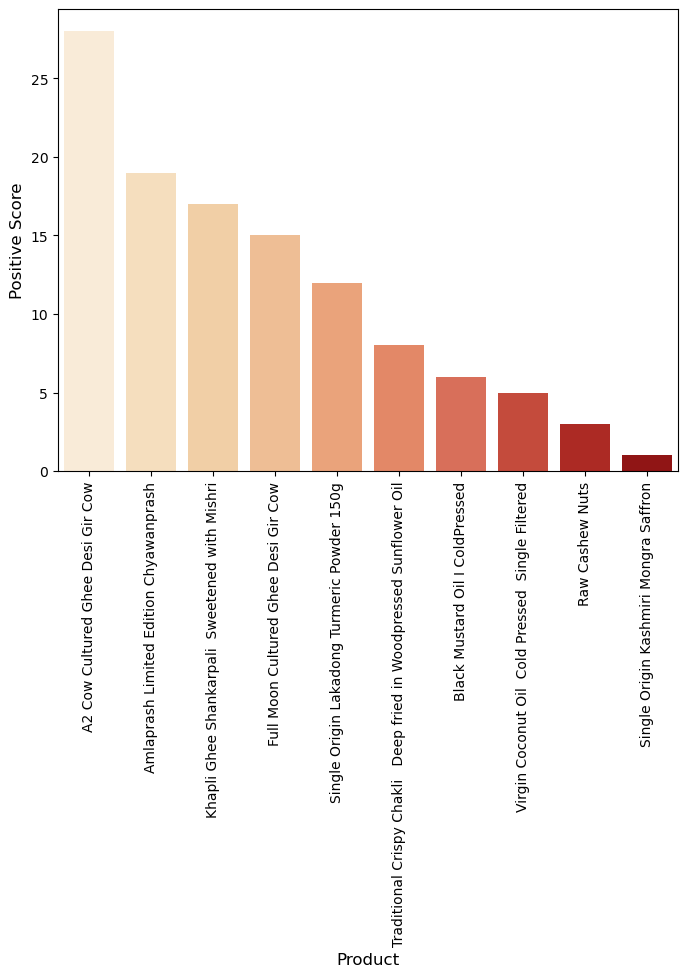

In [31]:
# Sort the data in descending order

sorted_data = sorted(zip(df['POSITIVE SCORE'], df['heading']), reverse=True)

# Extract sorted categories and values
sorted_values, sorted_categories = zip(*sorted_data)
sorted_values = list(sorted_values)
sorted_categories = list(sorted_categories)

plt.figure(figsize=(8,6))
sns.barplot(y=sorted_values,x=sorted_categories,palette="OrRd")
plt.ylabel('Positive Score',fontsize=12)
plt.xlabel('Product',fontsize=12)
plt.xticks(rotation=90)
plt.show()

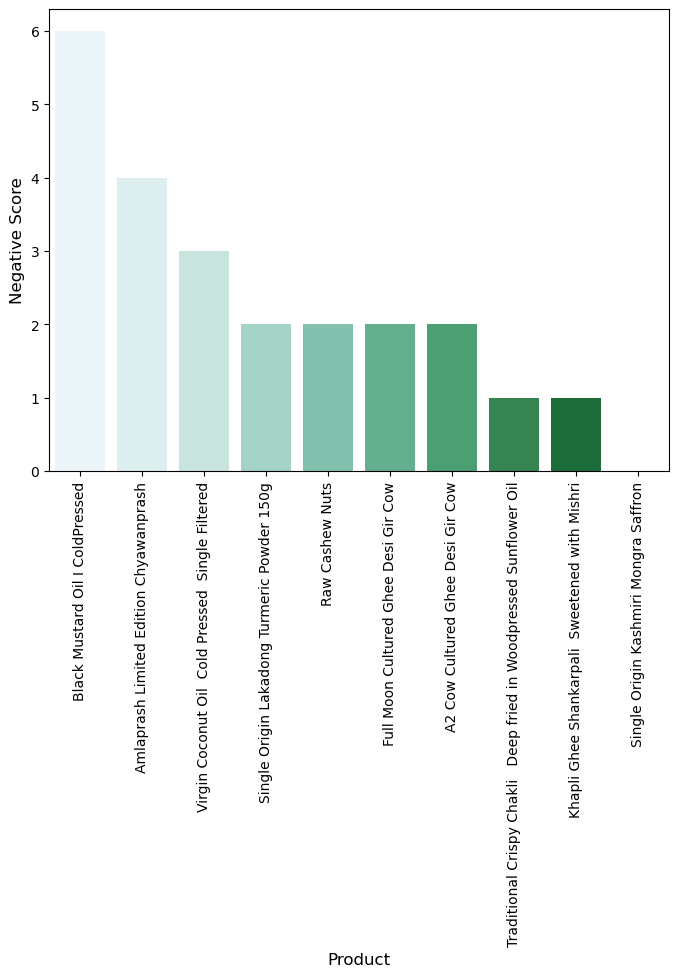

In [32]:
# Sort the data in descending order

sorted_data = sorted(zip(df['NEGATIVE SCORE'], df['heading']), reverse=True)

# Extract sorted categories and values
sorted_values, sorted_categories = zip(*sorted_data)
sorted_values = list(sorted_values)
sorted_categories = list(sorted_categories)

plt.figure(figsize=(8,6))
sns.barplot(y=sorted_values,x=sorted_categories,palette="BuGn")
plt.ylabel('Negative Score',fontsize=12)
plt.xlabel('Product',fontsize=12)
plt.xticks(rotation=90)
plt.show()

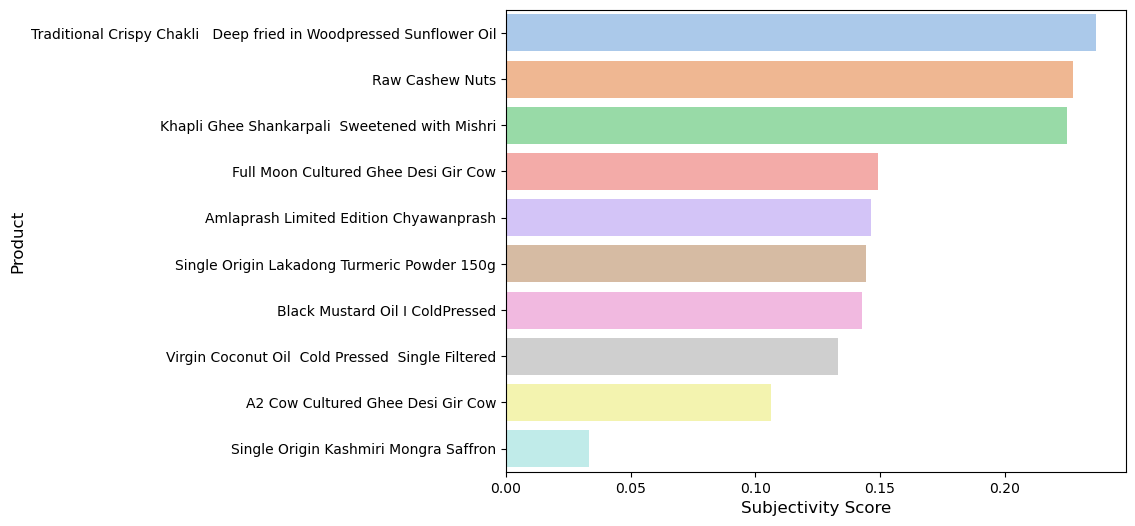

In [35]:
# Sort the data in descending order

sorted_data = sorted(zip(df['SUBJECTIVITY SCORE'], df['heading']), reverse=True)

# Extract sorted categories and values
sorted_values, sorted_categories = zip(*sorted_data)
sorted_values = list(sorted_values)
sorted_categories = list(sorted_categories)

plt.figure(figsize=(8,6))
sns.barplot(x=sorted_values,y=sorted_categories,palette='pastel')
plt.xlabel('Subjectivity Score',fontsize=12)
plt.ylabel('Product',fontsize=12)
plt.show()

More such analysis can be done for various products by using different aspects of NLP 

### Thank You ....